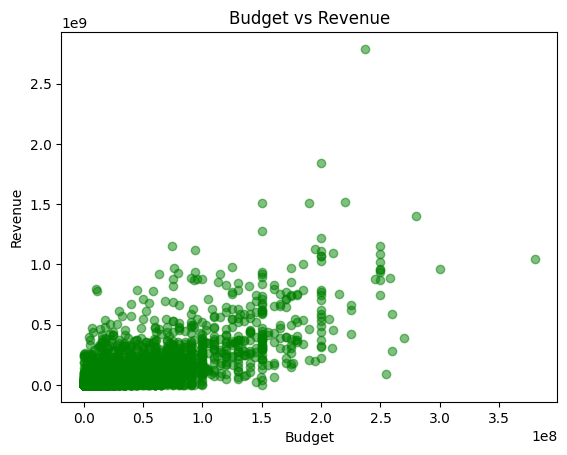

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
<class 'str'>
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


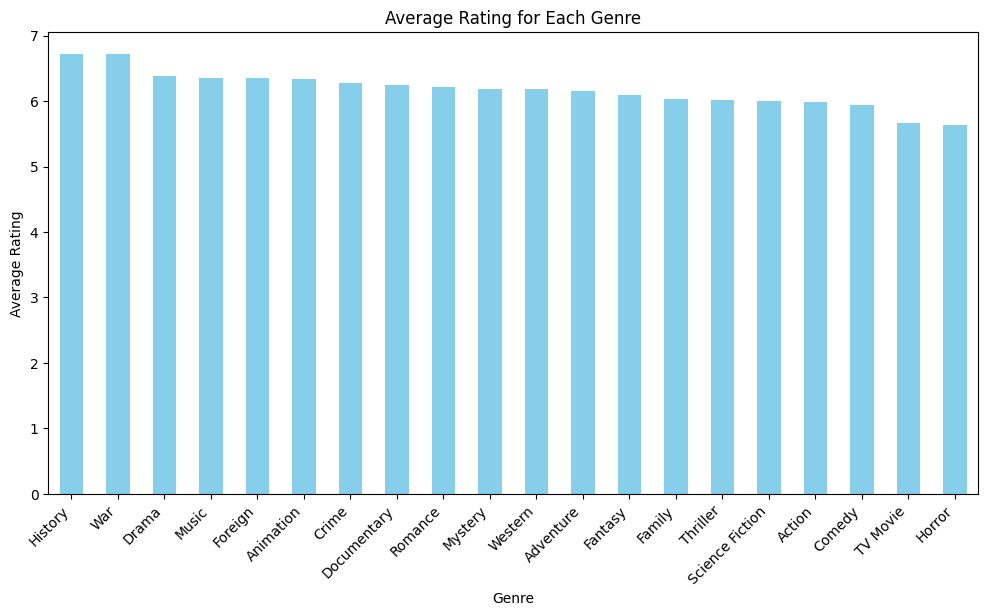

           id  vote_average variable   value
0       19995           7.2   Action  Action
1         285           6.9   Action  Action
2      206647           6.3   Action  Action
3       49026           7.6   Action  Action
4       49529           6.1   Action  Action
...       ...           ...      ...     ...
96055    9367           6.6  Western     NaN
96056   72766           5.9  Western     NaN
96057  231617           7.0  Western     NaN
96058  126186           5.7  Western     NaN
96059   25975           6.3  Western     NaN

[96060 rows x 4 columns]


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

ds = pd.read_csv('./tmdb_5000_movies.csv')
movies=pd.DataFrame(ds)
movies['release_date'] = pd.to_datetime(movies['release_date'])

decade_rating={}

movies['release_date'] = pd.to_datetime(movies['release_date'])

movies['decade'] = (movies['release_date'].dt.year // 10) * 10

decade_avg_ratings = movies.groupby('decade')['vote_average'].mean()

# plt.bar(decade_avg_ratings['decade'], decade_avg_ratings['vote_average'], color='green',width=5)

# plt.xlabel('Decade')
# plt.ylabel('Average Rating')

# plt.grid(axis='y')
# plt.show()

plt.scatter(movies['budget'], movies['revenue'], alpha=0.5, color='green')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

print(movies['genres'][0])
print(type(movies['genres'][0]))

x= json.loads(movies['genres'][0])
print(x)

gen0=movies['genres'][0]

def f(t):
    s = t['genres']
    s = json.loads(s)
    ls = []
    for i in s:
        ls.append(i['name'])
    return pd.Series(ls, index=ls)

genre_split = movies.apply(f, axis=1, result_type="expand")

movies = pd.concat([movies, genre_split], axis=1)

df = pd.melt(movies, id_vars=['id', 'vote_average'], value_vars=genre_split.columns, )

average_ratings = df.groupby('value')['vote_average'].mean()


plt.figure(figsize=(12, 6))
average_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Rating for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()
print(df)




    







In [ ]:
df = pd.DataFrame(data)

# Convert the 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year and store it in a separate NumPy array
years_array = np.array(df['release_date'].dt.year)

# Print the NumPy array containing the years
print(years_array)

In [ ]:
decade_ratings = {}

# Process each movie
for movie in movies_data:
    year = movie['release_year']
    decade = (year // 10) * 10  # Calculate the decade

    if decade in decade_ratings:
        decade_ratings[decade]['total_rating'] += movie['imdb_rating']
        decade_ratings[decade]['count'] += 1
    else:
        decade_ratings[decade] = {'total_rating': movie['imdb_rating'], 'count': 1}

# Calculate the average rating for each decade
decade_averages = {decade: data['total_rating'] / data['count'] for decade, data in decade_ratings.items()}

# Create a bar graph
decades = list(decade_averages.keys())
average_ratings = list(decade_averages.values())

plt.bar(decades, average_ratings, color='green')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating for Each Decade')
plt.show()

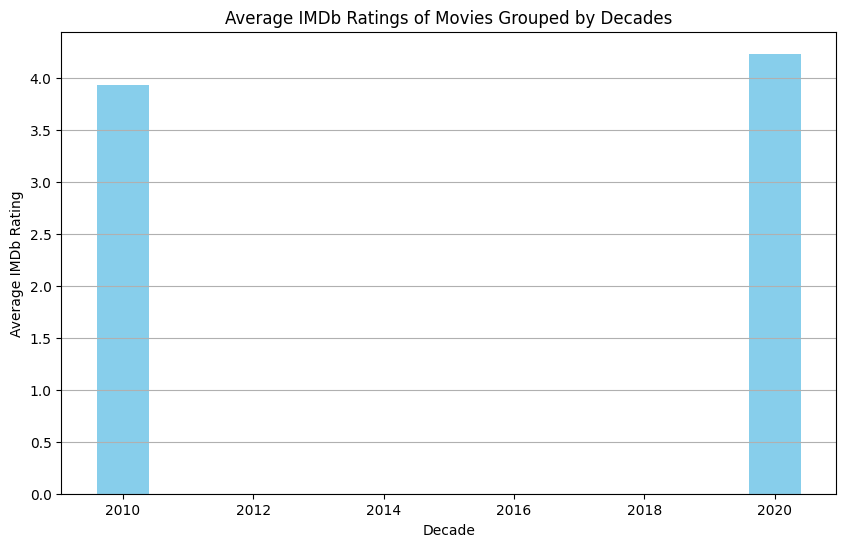

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual data)
data = {
    'release_date': ['2022-01-15', '2019-05-28', '2020-11-10', '2021-08-03', '2015-04-20', '2016-09-08'],
    'imdb_rating': [4.5, 3.8, 4.2, 4.0, 3.9, 4.1]
}

movies = pd.DataFrame(data)

# Convert 'release_date' to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Bin years into decades
movies['decade'] = (movies['release_date'].dt.year // 10) * 10

# Calculate average ratings for each decade
decade_avg_ratings = movies.groupby('decade')['imdb_rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(decade_avg_ratings['decade'], decade_avg_ratings['imdb_rating'], color='skyblue')

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Ratings of Movies Grouped by Decades')

# Show the plot
plt.grid(axis='y')
plt.show()
